In [1]:
import numpy as np

In [2]:
def g(x):
    y = x**2.+3.4*x**4.-6.6*x**3.-4.
    return y

In [3]:
def g(x):
    y = np.power(x,2.)-4.
    return y

In [3]:
class Two_Layer_NN:
    def __init__(self,H):
        self.W_1 = np.random.randn(1,H)
        self.b_1 = np.random.randn(1,H)
        self.W_2 = np.random.randn(H,1)
        self.b_2 = np.random.randn(1,1)
        
        
    def forward_pass(self, X):
        self.h = X.dot(self.W_1)+self.b_1
        self.hact = 1./(1.+np.exp(-self.h))
        y_pred = self.hact.dot(self.W_2)+self.b_2
        return y_pred
    
    def loss_fun(self, X, Y):
        y_pred = self.forward_pass(X)
        loss = np.square(Y-y_pred).sum()
        return loss, y_pred
    
    def backward(self, X, Y):
        loss, y_pred = self.loss_fun(X,Y)
        
        grad_y_pred = 2*(y_pred - Y)
        grad_W2 = self.hact.T.dot(grad_y_pred) # d Loss/d y_pred * d y_pred/d W2
        grad_b2 = grad_y_pred.sum() # d Loss/d y_pred * d y_pred/d b2
        grad_hact = grad_y_pred.dot(self.W_2.T) # d Loss/d y_pred * d y_pred/d hact
        grad_W1 = X.T.reshape(-1,1).dot(grad_hact*self.hact*(1-self.hact)) # d Loss/d y_pred * d y_pred/d hact *d hact/dh * dh/dW1
        grad_b1 = (grad_hact*self.hact*(1-self.hact)).sum()
        
        
        return grad_W1,  grad_b1,  grad_W2,  grad_b2 
    
    def gradient_descent(self, X, Y):
        
        grad_W1,  grad_b1,  grad_W2,  grad_b2 = self.backward(X,Y)
        
        
        self.W_1 -= 5e-3 * grad_W1
        self.b_1 -= 5e-3 * grad_b1
        self.W_2 -= 5e-3 * grad_W2
        self.b_2 -= 5e-3 * grad_b2
        
        
        

In [4]:
DeuxLNN = Two_Layer_NN(20)

In [5]:
Xtr = np.random.uniform(low=0.0, high=2., size=(1000))
Ytr = g(Xtr)

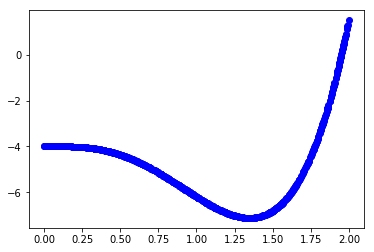

In [7]:
import matplotlib.pyplot as plt
plt.plot(Xtr,Ytr, 'bo')

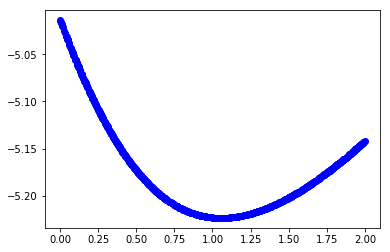

In [8]:
ypred = np.zeros_like(Ytr)
for i in range(1000):
    ypred[i] = DeuxLNN.forward_pass(Xtr[i].reshape(1,1))
plt.plot(Xtr,ypred, 'bo')

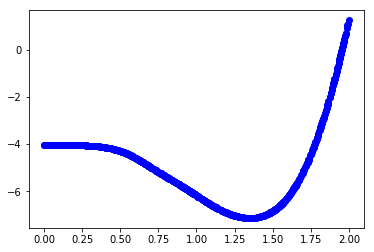

In [10]:
for j in range(1000):
    for i in range(1000):
        DeuxLNN.gradient_descent(Xtr[i].reshape(1,1), Ytr[i].reshape(1,1))
ypred_tr = np.zeros_like(Ytr)
for i in range(1000):
    ypred_tr[i] = DeuxLNN.forward_pass(Xtr[i].reshape(1,1))
plt.plot(Xtr,ypred_tr, 'bo')

In [13]:
Xtest=np.random.uniform(low=-1., high=3, size=(1000))
Ytest = g(Xtest)

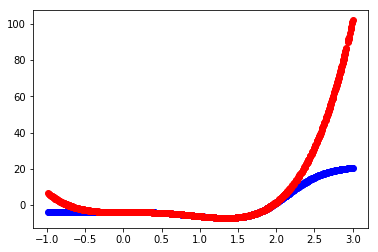

In [14]:
ypred_test = np.zeros_like(Ytest)
for i in range(1000):
    ypred_test[i] = DeuxLNN.forward_pass(Xtest[i].reshape(1,1))
plt.plot(Xtest,ypred_test, 'bo')
plt.plot(Xtest,g(Xtest), 'ro')
